# FP1–V3A. Mjerenje istosmjernog napona i struje

## Matija Pajas

In [1]:
from scipy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#from sympy import *
#init_printing()

from IPython.display import HTML
from IPython.display import display

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Pokaži/sakrij kod"></form>''')

In [3]:
display(HTML("""
<style>
.output {
    display: block;
    align-items: center;
    text-align: center;
}
td {
  text-align: center;
  vertical-align: middle;
}
</style>
"""))

## Cilj vježbe

U vježbi mjerimo istosmjerni napon i struju na različitim žicama od konstantana kojima želimo odrediti otpore i u konačnici njihovu otpornost linearnom regresijom. U tome zadatku pomoći će nam i metoda mjerenja koja se zove metoda četiri kontakta kojom ostvarujemo preciznija mjerenja zbog manjih smetnji.

## Mjerenje i pokus

Mjerni uređaji sastoje se od istosmjernog izvora od $4,5 \ \mathrm{V}$, četiri žice od konstantana duge $l = 1 \ \mathrm{m}$ i različitih promjera poprečnog presjeka, otpor od $22 \ \mathrm{\Omega}$ i 2 analogna instrumenta za mjerenje napona i struje.

Prije nego zatvorimo strujni krug moramo se pobrinuti da smo stavili otpornik od $22 \ \mathrm{\Omega}$ kako ne bismo izvor spojili u kratki spoj i dopustili preveliku struju. Zatim moramo spojiti instrumente u strujni krug, a voltmetar moramo priključiti tako da njegove kontakte stavimo na kontakte žica kojima spajamo žice od konstantana u strujni krug. Razlog tomu je što ćemo na taj način izbjeći pad napona između kontakata koji bi bio prisutan da nisu spojeni na isti kontakt, a time ostvarujemo preciznije mjerenje. Jednom kada je sve spojeno očitavamo napone i struje sa analognih instrumenata tako da ih prije zatvaranja strujnog kruga postavimo na najvišu osjetljivost te ju smanjujemo kada strujni krug zatvorimo. Izmjereni podaci o naponima i strujama za različite dimenzije žica moći ćemo iskoristiti kako bismo našli njihov individualni otpor te otpornost materijala od kojeg su napravljene.

## Zadatak 1 - Određivanje otpora žica od konstantana sa različitim poprečnim presjekom

U ovome zadatku koristimo se Ohmovim zakonom koji glasi $R = \frac{U}{I}$ kako bismo odredili otpor žica iz izmjerenih napona i struja. To ćemo napraviti tako što ćemo izračunati srednje vrijednosti i nepouzdanosti mjerenih veličina, uvrstiti ih u Ohmov zakon te izvesti izraz za neovisnost otpora.

Podaci o mjerenjima za različite žice mogu se pronaći u tablicama niže.

In [4]:
U = [0.1,0.12,0.11,0.11,0.1]
I = [162,165,160,165,165]

d = {"$U$ / $\mathrm{V}$": U,
     "$I$ / $\mathrm{mA}$": I,
     "$R$ / $\mathrm{\Omega}$": [u/(i*10**-3) for u,i in zip(U,I)]}
df = pd.DataFrame(data=d, index=range(1,6))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#print("2r=1mm")
#df

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"> 2r = 1 mm</th>
      <th style="min-width: 12;">$U$ / $\mathrm{V}$</th>
      <th style="min-width: 12;">$I$ / $\mathrm{mA}$</th>
      <th style="min-width: 12;">$R$ / $\mathrm{\Omega}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>0,10</td>
      <td>162</td>
      <td>0,617284</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>0,12</td>
      <td>165</td>
      <td>0,727273</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>0,11</td>
      <td>160</td>
      <td>0,687500</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>0,11</td>
      <td>165</td>
      <td>0,666667</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>0,10</td>
      <td>165</td>
      <td>0,606061</td>
    </tr>
  </tbody>
</table>

In [5]:
U = [0.21,0.22,0.24,0.21,0.22]
I = [160,162,170,159,160]

d = {"$U$ / $\mathrm{V}$": U,
     "$I$ / $\mathrm{mA}$": I,
     "$R$ / $\mathrm{\Omega}$": [u/(i*10**-3) for u,i in zip(U,I)]}
df = pd.DataFrame(data=d, index=range(1,6))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#print("2r=0.7mm")
#df

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;">2r = 0,7 mm</th>
      <th style="min-width: 12;">$U$ / $\mathrm{V}$</th>
      <th style="min-width: 12;">$I$ / $\mathrm{mA}$</th>
      <th style="min-width: 12;">$R$ / $\mathrm{\Omega}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>0,21</td>
      <td>160</td>
      <td>1,312500</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>0,22</td>
      <td>162</td>
      <td>1,358025</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>0,24</td>
      <td>170</td>
      <td>1,411765</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>0,21</td>
      <td>159</td>
      <td>1,320755</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>0,22</td>
      <td>160</td>
      <td>1,375000</td>
    </tr>
  </tbody>
</table>

In [6]:
U = [0.36,0.4,0.39,0.41,0.4]
I = [140,156,150,153,160]

d = {"$U$ / $\mathrm{V}$": U,
     "$I$ / $\mathrm{mA}$": I,
     "$R$ / $\mathrm{\Omega}$": [u/(i*10**-3) for u,i in zip(U,I)]}
df = pd.DataFrame(data=d, index=range(1,6))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#print("2r=0.5mm")
#df

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;">2r = 0,5 mm</th>
      <th style="min-width: 12;">$U$ / $\mathrm{V}$</th>
      <th style="min-width: 12;">$I$ / $\mathrm{mA}$</th>
      <th style="min-width: 12;">$R$ / $\mathrm{\Omega}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>0,36</td>
      <td>140</td>
      <td>2,571429</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>0,40</td>
      <td>156</td>
      <td>2,564103</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>0,39</td>
      <td>150</td>
      <td>2,600000</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>0,41</td>
      <td>153</td>
      <td>2,679739</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>0,40</td>
      <td>160</td>
      <td>2,500000</td>
    </tr>
  </tbody>
</table>

In [7]:
U = [0.72,0.76,0.75,0.73,0.75]
I = [140,144,150,141,146]

d = {"$U$ / $\mathrm{V}$": U,
     "$I$ / $\mathrm{mA}$": I,
     "$R$ / $\mathrm{\Omega}$": [u/(i*10**-3) for u,i in zip(U,I)]}
df = pd.DataFrame(data=d, index=range(1,6))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#print("2r=0.35mm")
#df

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;">2r = 0,35 mm</th>
      <th style="min-width: 12;">$U$ / $\mathrm{V}$</th>
      <th style="min-width: 12;">$I$ / $\mathrm{mA}$</th>
      <th style="min-width: 12;">$R$ / $\mathrm{\Omega}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>0,72</td>
      <td>140</td>
      <td>5,142857</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>0,76</td>
      <td>144</td>
      <td>5,277778</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>0,75</td>
      <td>150</td>
      <td>5,000000</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>0,73</td>
      <td>141</td>
      <td>5,177305</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>0,75</td>
      <td>146</td>
      <td>5,136986</td>
    </tr>
  </tbody>
</table>

#### 2r = 1 mm
$U = (0,10800000000000001 \pm 0,0037416573867739395) \ \mathrm{V}$<br>
$I = (163,4 \pm 1,0295630140987) \ \mathrm{mA}$
#### 2r = 0,7 mm
$U = (0,21999999999999997 \pm 0,00547722557505166) \ \mathrm{V}$<br>
$I = (162,2 \pm 2,0099751242241775) \ \mathrm{mA}$ 
#### 2r = 0,5 mm
$U = (0,392 \pm 0,008602325267042629) \ \mathrm{V}$<br>
$I = (151,8 \pm 3,3823069050575523) \ \mathrm{mA}$ 
#### 2r = 0,35 mm
$U = (0,742 \pm 0,0073484692283495405) \ \mathrm{V}$<br>
$I = (144,2 \pm 1,7999999999999998) \ \mathrm{mA}$ 

Nakon zaokruživanja vrijednosti su:

#### 2r = 1 mm
$U = (0,108 \pm 0,004) \ \mathrm{V}$<br>
$I = (0,163 \pm 0,001) \ \mathrm{A}$ 
#### 2r = 0,7 mm
$U = (0,220 \pm 0,005) \ \mathrm{V}$<br>
$I = (0,162 \pm 0,002) \ \mathrm{A}$ 
#### 2r = 0,5 mm
$U = (0,392 \pm 0,009) \ \mathrm{V}$<br>
$I = (0,152 \pm 0,003) \ \mathrm{A}$ 
#### 2r = 0,35 mm
$U = (0,742 \pm 0,007) \ \mathrm{V}$<br>
$I = (0,144 \pm 0,002) \ \mathrm{A}$ 

Sada kada su srednje vrijednosti i nepouzdanosti određene za sve žice koristiti ćemo se Ohmovim zakonom i izračunati nepouzdanost kako bismo izračunali otpore svake žice.

$$\overline{R} = \frac{\overline{U}}{\overline{I}}$$

$$
\begin{align}
M_R & = \sqrt{M_{I}^{2} \left(\frac{\partial}{\partial I} R{\left (U,I \right )}\right)^{2} + M_{U}^{2} \left(\frac{\partial}{\partial U} R{\left (U,I \right )}\right)^{2}}\\
M_R & = \sqrt{\frac{M_{U}^{2}}{I^{2}} + \frac{M_{I}^{2} U^{2}}{I^{4}}} \\
M_R & = \frac{U}{I} \sqrt{\frac{M_{U}^{2}}{I U} + \frac{M_{I}^{2} U}{I^{3}}}
\end{align}
$$

$R = (0,6625 \pm 0,0248742615879265) \ \mathrm{\Omega}$<br>
$R = (1,35802 \pm 0,0351239038838477) \ \mathrm{\Omega}$<br>
$R = (2,5789 \pm 0,0780815255109396) \ \mathrm{\Omega}$<br>
$R = (5,1527 \pm 0,0865146445659641) \ \mathrm{\Omega}$<br>

Te su finalni rezultati nakon zaokruživanja:

$R = (0,66 \pm 0,02) \ \mathrm{\Omega}$ ; $R = 3,03 \ \%$ (2r = 1 mm) <br>
$R = (1,36 \pm 0,04) \ \mathrm{\Omega}$ ; $R = 2,94 \ \%$ (2r = 0,7 mm)<br>
$R = (2,59 \pm 0,08) \ \mathrm{\Omega}$ ; $R = 3,1 \ \%$ (2r = 0,5 mm)<br>
$R = (5,15 \pm 0,09) \ \mathrm{\Omega}$ ; $R = 1,75 \ \%$ (2r = 0,35 mm)<br>

In [8]:
#T,Dt,Mt,Md = symbols("T,D_t,M_t,M_D_t")
#U,I,Mu,Mi = symbols("U,I,M_U,M_I")
#R = Function("R")(U,I)
#display(sqrt((R.diff(U)*Mu)**2 + (R.diff(I)*Mi)**2))
#R = U/I
#display(R)
#display(sqrt((R.diff(U)*Mu)**2 + (R.diff(I)*Mi)**2))
#display(sqrt((((R.diff(U)*Mu)**2 + (R.diff(I)*Mi)**2)/R).simplify()))

#računanje nepouzdanosti
#display(sqrt((R.diff(U)*Mu)**2 + (R.diff(I)*Mi)**2).subs([(U,0.108), (I,0.163), (Mu,0.004), (Mi,0.001)]).evalf())
#display(sqrt((R.diff(U)*Mu)**2 + (R.diff(I)*Mi)**2).subs([(U,0.220), (I,0.162), (Mu,0.005), (Mi,0.002)]).evalf())
#display(sqrt((R.diff(U)*Mu)**2 + (R.diff(I)*Mi)**2).subs([(U,0.392), (I,0.152), (Mu,0.009), (Mi,0.003)]).evalf())
#display(sqrt((R.diff(U)*Mu)**2 + (R.diff(I)*Mi)**2).subs([(U,0.742), (I,0.144), (Mu,0.007), (Mi,0.002)]).evalf())

## Zadatak 2 - Ovisnost log(R) o log(r) i linearna regresija

Prije nego možemo provjeriti kvadratnu ovisnost otpora o radijusu poprečnog presjeka žice potrebno je linearizirati izraz za otpor žice. To ćemo napraviti jednostavno tako da logaritmiramo obje strane jednakosti i iskoristimo svojstva logaritama kako bismo došli do izraza koji predstavlja jednadžbu pravca.

$$R = \frac{\rho l}{r^2\pi}$$

$$
\begin{align}
\ln(R) & =\ln\left ( \frac{\rho l}{r^{2}\pi} \right ) \\
\ln(R) & =\ln(r^{-2})+\ln\left ( \frac{\rho l}{\pi} \right )\\
\ln(R) & =-2\ln(r)+ \ln\left ( \frac{\rho l}{\pi} \right )
\end{align}
$$

Ako je jednadžba pravca
$$y=ax+b$$

možemo prepoznati veličine u našem izrazu na sljedeći način:

$$ X = \ln(r)$$
$$ Y = \ln(R)$$
$$ a = -2$$
$$ b=\ln(\frac{\rho l}{\pi}) $$

Sada provodimo metodu najmanjih kvadrata nad podacima te očekujemo dobiti nagib pravca oko $a = -2$ jer će to značiti da otpor zaista opada sa kvadratom radijusa. Prije nego krenemo s računom potrebno je argumente pod logaritmom učiniti bezdimenzionalnima tako da ih podijelimo odgovarajućom mjernom jedinicom:

$$\ln\left(\frac{r}{1 \ \mathrm{m}}\right)$$

$$\ln\left(\frac{R}{1 \ \mathrm{\Omega}}\right)$$

a = -1.9530490167832446 ± 0.018383638176542774
b = -15.24945614775538 ± 0.14955376486108998


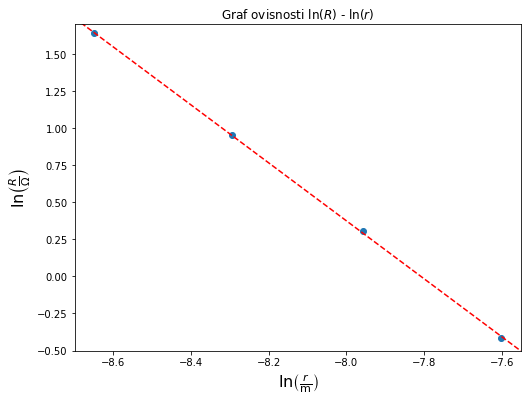

In [9]:
#R-r
R = [0.66,1.36,2.59,5.15]
r = [0.5,0.35,0.25,0.175]

R = [log(x) for x in R]
r = [log(x/1000) for x in r]

pars,cov=curve_fit(lambda x,a,b: a*x+b, r, R)

a=pars[0]
b=pars[1]

x_fit=linspace(-15,15)
y_fit=a*x_fit+b

print("a =", pars[0],"±", sqrt(cov[0,0]))
print("b =",pars[1],"±", sqrt(cov[1,1]))

plt.figure(figsize=(8,6))
plt.scatter(r,R)
plt.plot(x_fit,y_fit,color="red",linestyle="--")
plt.xlim(-8.7,-7.55)
plt.ylim(-0.5,1.7)

plt.title("Graf ovisnosti $\ln(R)$ - $\ln(r)$")
plt.xlabel(r"$\ln\left(\frac{r}{\mathrm{m}}\right)$",fontsize=16)
plt.ylabel(r"$\ln\left(\frac{R}{\mathrm{\Omega}}\right)$",fontsize=16);

$ a = -1.95 ± 0.02 $

$ b = -15.2 ± 0.1$

Dobili smo $a$ koji je u jako dobrom slaganju sa izrazom koji smo izveli te točke na grafu nemaju vidljivog odstupanja i zaista leže skoro na pravcu pa možemo zaključiti da je riječ o ovisnosti $R \propto r^{-2}$.

## Zadatak 3 - Određivanje otpornosti iz koeficijenata izračunatog pravca

Kako bismo odredili otpornost konstantana koristiti ćemo se vrijednosti odsječka izračunatog pravca sa y-osi.

$$b=\log\left ( \frac{\rho l}{\pi} \right)$$

odnosno kad uvrstimo $l=1$ $\mathrm{m}$ koji uzimamo kao konstantu i sredimo izraz dobivamo

$$e^b = \frac{\rho}{\pi}$$

$$\rho = e^b \pi$$

te dobimo da je

$$\rho = 7,488927054 \times 10^{-7} \ \mathrm{\Omega m}$$

i računamo nepouzdanost.

$$
\begin{align}
M_{\rho} &= \sqrt{\left ( \frac{\partial\rho }{\partial b}M_{b} \right )^{2}}\\
M_{\rho} &= e^b\pi M_b = 1,123339058 \times 10^{-7} \ \mathrm{\Omega m}
\end{align}
$$

Konačan rezultat je:

$$\rho = (0,7 \pm 0,1) \ \mathrm{ \mu \Omega m} \ ;\ R = 14,28 \ \%$$

## Zaključak

Nakon obrade podataka uspjeli smo pokazati da je ovisnost otpora o radijusu poprečnog presjeka $R \propto r^{-2}$, no bez obzira na to nismo uspjeli dobiti dovoljno dobar rezultat otpornosti koja bi trebala biti oko $\rho = 0,49 \ \mathrm{ \mu \Omega m}$. Svijesni smo toga zbog velike pogreške u konačnom rezultatu bez obzira što smo imali male pogreške u određivanju otpora. Razlog tomu je očitavanje sa analognih instrumenata koji nemaju dovoljno veliku preciznost, ali su davali konzistentna mjerenja jer smo uspjeli pokazati ovisnost otpora o radijusu. To me navodi na zaključak da niti otpori nisu najbolje određeni iako imaju malo odstupanje baš zbog toga što na analognom instrumentu nisam imao puno izbora nego odabrati jednu od crtica koja se čini najbliže kazaljci.